In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

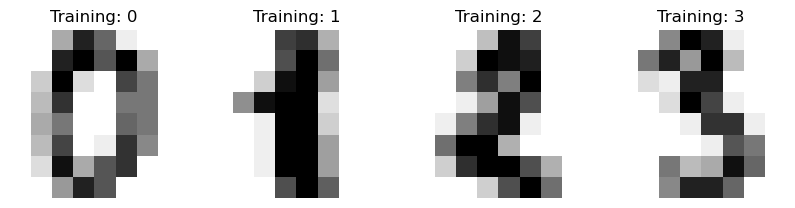

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

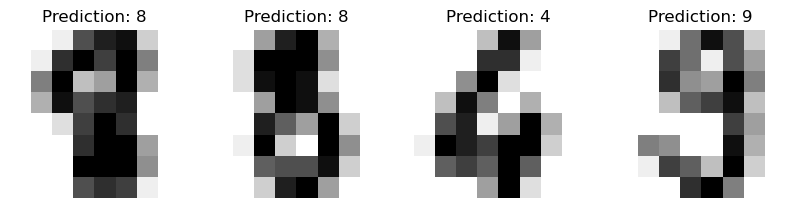

In [4]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [5]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


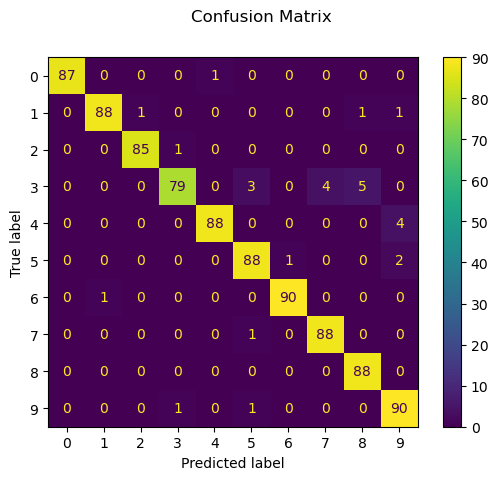

In [6]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [7]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




# Random Classifier -- Most Frequent 

In [16]:
clf = DummyClassifier(strategy='uniform', random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
predicted = clf.predict(X_test)

In [17]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier DummyClassifier(random_state=0, strategy='uniform'):
              precision    recall  f1-score   support

           0       0.12      0.12      0.12        88
           1       0.11      0.10      0.10        91
           2       0.03      0.03      0.03        86
           3       0.13      0.15      0.14        91
           4       0.10      0.10      0.10        92
           5       0.09      0.10      0.10        91
           6       0.07      0.07      0.07        91
           7       0.12      0.11      0.12        89
           8       0.06      0.06      0.06        88
           9       0.08      0.08      0.08        92

    accuracy                           0.09       899
   macro avg       0.09      0.09      0.09       899
weighted avg       0.09      0.09      0.09       899




Confusion matrix:
[[11  8  5 10 10  8  8 15  7  6]
 [11  9 14 10  7 10 12  6  7  5]
 [ 8 10  3 18 12 11  6  4  6  8]
 [ 6  5  9 14 10 13  4 11 10  9]
 [ 9  7 16  8  9  6 15  6  9  7]
 [ 6 10  6  9  5  9  9  7 19 11]
 [ 5 11  7  8 14 11  6  7 13  9]
 [ 4  6 12 12  9  7 10 10  5 14]
 [15 10  7  9  8 11  6  7  5 10]
 [14  8  8 12  9  9 10 10  5  7]]


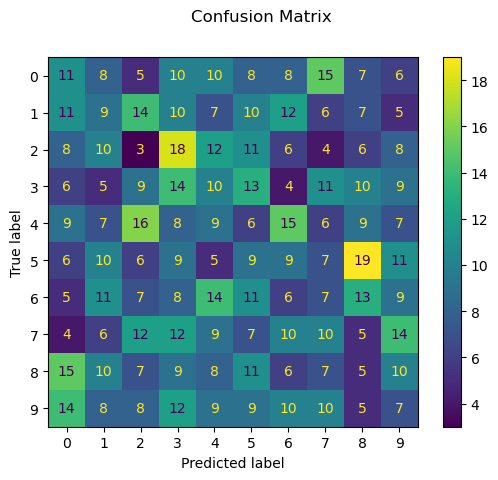

In [18]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [19]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       0.12      0.12      0.12        88
           1       0.11      0.10      0.10        91
           2       0.03      0.03      0.03        86
           3       0.13      0.15      0.14        91
           4       0.10      0.10      0.10        92
           5       0.09      0.10      0.10        91
           6       0.07      0.07      0.07        91
           7       0.12      0.11      0.12        89
           8       0.06      0.06      0.06        88
           9       0.08      0.08      0.08        92

    accuracy                           0.09       899
   macro avg       0.09      0.09      0.09       899
weighted avg       0.09      0.09      0.09       899




# Random Classifier -- Uniform Choice

In [12]:
clf = DummyClassifier(strategy='uniform', random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
predicted = clf.predict(X_test)

In [13]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier DummyClassifier(random_state=0, strategy='uniform'):
              precision    recall  f1-score   support

           0       0.12      0.12      0.12        88
           1       0.11      0.10      0.10        91
           2       0.03      0.03      0.03        86
           3       0.13      0.15      0.14        91
           4       0.10      0.10      0.10        92
           5       0.09      0.10      0.10        91
           6       0.07      0.07      0.07        91
           7       0.12      0.11      0.12        89
           8       0.06      0.06      0.06        88
           9       0.08      0.08      0.08        92

    accuracy                           0.09       899
   macro avg       0.09      0.09      0.09       899
weighted avg       0.09      0.09      0.09       899




Confusion matrix:
[[11  8  5 10 10  8  8 15  7  6]
 [11  9 14 10  7 10 12  6  7  5]
 [ 8 10  3 18 12 11  6  4  6  8]
 [ 6  5  9 14 10 13  4 11 10  9]
 [ 9  7 16  8  9  6 15  6  9  7]
 [ 6 10  6  9  5  9  9  7 19 11]
 [ 5 11  7  8 14 11  6  7 13  9]
 [ 4  6 12 12  9  7 10 10  5 14]
 [15 10  7  9  8 11  6  7  5 10]
 [14  8  8 12  9  9 10 10  5  7]]


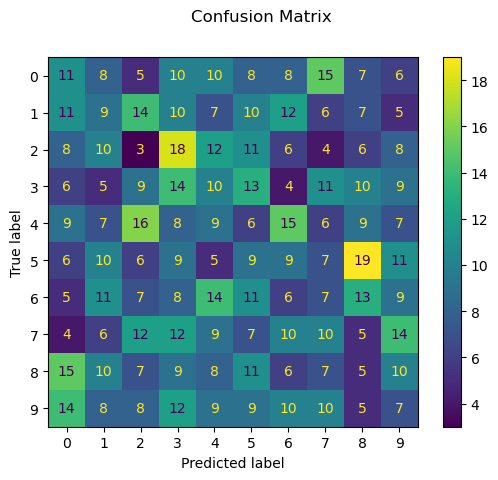

In [14]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [15]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       0.12      0.12      0.12        88
           1       0.11      0.10      0.10        91
           2       0.03      0.03      0.03        86
           3       0.13      0.15      0.14        91
           4       0.10      0.10      0.10        92
           5       0.09      0.10      0.10        91
           6       0.07      0.07      0.07        91
           7       0.12      0.11      0.12        89
           8       0.06      0.06      0.06        88
           9       0.08      0.08      0.08        92

    accuracy                           0.09       899
   macro avg       0.09      0.09      0.09       899
weighted avg       0.09      0.09      0.09       899


